In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import random

# 1. P-3.55
Perform an experimental analysis of the three algorithms prefix average1,
prefix average2, and prefix average3, from Section 3.3.3. Visualize their
running times as a function of the input size with a log-log chart.


In [ ]:
# Nested loops
def prefix_average1(S):
  n = len(S)
  A = [0] * n
  for j in range(n):
    total = 0
    for i in range(j + 1):
      total += S[i]
      A[j] = total / (j + 1)
  return A

# Sum function
def prefix_average2(S):
  n = len(S)
  A = [0] * n
  for j in range(n):
    A[j] = sum(S[0:j + 1]) / (j + 1)
  return A

# Single loop
def prefix_average3(S):
  n = len(S)
  A = [0] * n
  total = 0
  for j in range(n):
    total += S[j]
    A[j] = total / (j + 1)
  return A

In [ ]:
def measure_time(function, input_sizes):
  times = []
  for size in input_sizes:
    data = list(range(size))
    start = time.time()
    function(data)
    end = time.time()
    times.append(end - start)
  return times

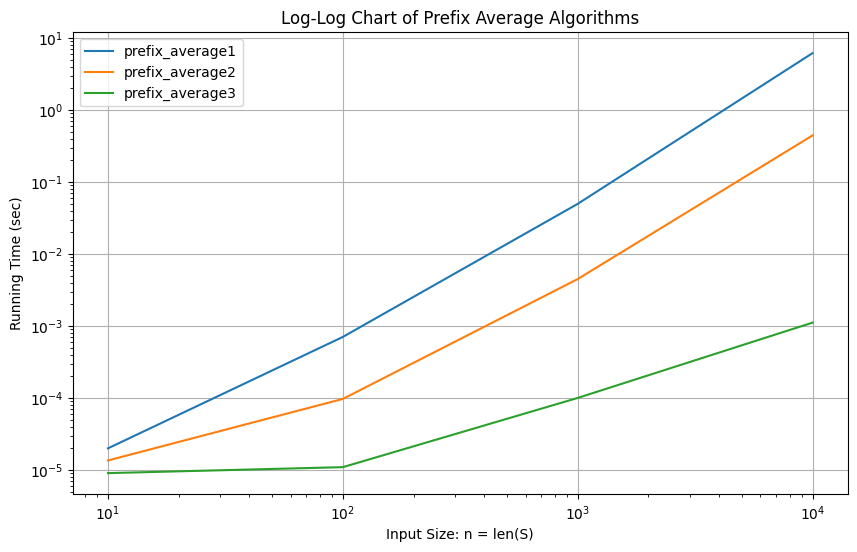

In [ ]:
input_sizes = [10, 100, 1000, 10000]

times1 = measure_time(prefix_average1, input_sizes)
times2 = measure_time(prefix_average2, input_sizes)
times3 = measure_time(prefix_average3, input_sizes)

plt.figure(figsize=(10, 6))
plt.loglog(input_sizes, times1, label="prefix_average1")
plt.loglog(input_sizes, times2, label="prefix_average2")
plt.loglog(input_sizes, times3, label="prefix_average3")
plt.xlabel("Input Size: n = len(S)")
plt.ylabel("Running Time (sec)")
plt.title("Log-Log Chart of Prefix Average Algorithms")
plt.legend()
plt.grid()
plt.show()


Conclusions:
1. The first one has nested for loops, making it the slowest, with a complexity of O(n²).
2. The second one is slightly more efficient, but at some point, it starts behaving similarly to the first one, meaning there is no significant difference in growth rate compared to the first. The complexity can be approximated as O(n²) as we can see in the graph, it resembles the first graph.
3. This one is the most efficient. Essentially, it performs the same as the previous one, but unlike it, it does not recalculate the sum of the first few elements from scratch each time. Instead, it remembers each previous sum and uses it for the next calculation by adding the current element. The complexity is O(n).

# 2. P-2.34
Write a Python program that inputs a document and then outputs a barchart plot of the frequencies of each
alphabet character that appears in that document.

In [ ]:
def alphabet_barchart(file_path):
  file = open(file_path, "r")
  text = file.read()

  letters = 'abcdefghijklmnopqrstuvwxyzšćčđ'
  frequency = {}

  for char in letters:
    frequency[char] = 0

  for char in text.lower():
    if char in letters:
      frequency[char] += 1

  plt.figure(figsize=(10, 6))
  plt.bar(frequency.keys(), frequency.values())
  plt.title("Frequencies of Alphabet Characters", fontsize=16)
  plt.xlabel("Alphabet Character", fontsize=14)
  plt.ylabel("Frequency", fontsize=14)
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

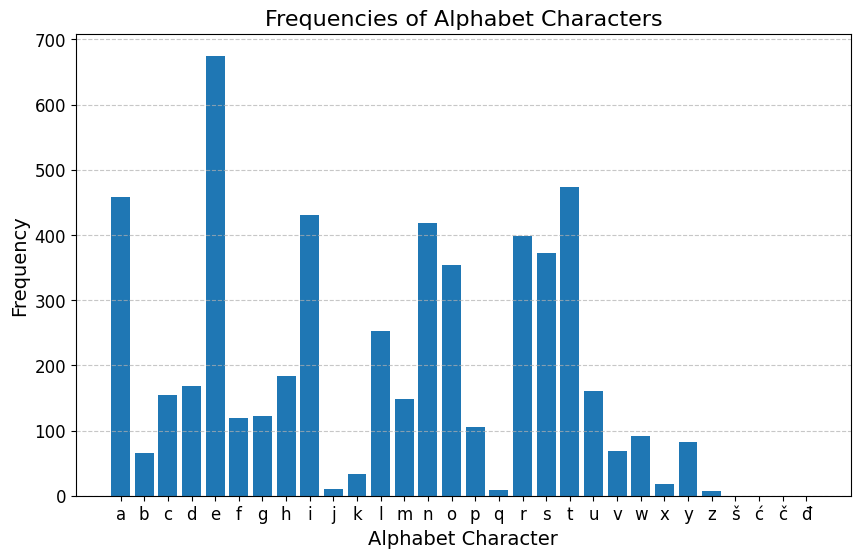

In [ ]:
alphabet_barchart("/watermelons.txt")

# 3. P-2.36
Write a Python program to simulate an ecosystem containing two types
of creatures, bears and fish. The ecosystem consists of a river, which is modeled as a relatively large list. Each element of the list should be a Bear object, a Fish object, or None. In each time step, based on a random process, each animal either attempts to move into an adjacent list location or stay where it is. If two animals of the same type are about to collide in the same cell then they stay where they are, but they create a new instance of that type of animal which is placed in a random empty (i.e., previously
None) location in the list. If a bear and a fish collide, however, then the fish dies (i.e., it disappears).

In [ ]:
class Bear:
  def __repr__(self):
        return "Bear"

class Fish:
  def __repr__(self):
        return "Fish"

def river_simulation(river_size, steps):
  river = [random.choice([Bear(), Fish(), None]) for _ in range(river_size)]

  for step in range(steps):
    print(f"Step {step + 1}: ", ["None" if x is None else x for x in river])

    for i in range(len(river)):
      if river[i] == None:
        continue

      move = random.choice([-1, 0, 1])
      new_pos = i + move

      if new_pos not in range(0, len(river) - 1):
        continue

      # If animal tried to move to None, allow it:
      if river[new_pos] is None:
        river[new_pos], river[i] = river[i], None

      # Collision of the same specie:
      elif type(river[new_pos]) == type(river[i]):
        empty_positions = [index for index, value in enumerate(river) if value is None]  # lista svih indeksa iz river na kojima su None vrednosti
        if len(empty_positions) > 0:
          river[random.choice(empty_positions)] = type(river[i])()

      # Fish comes to the Bear: (gets eaten)
      elif type(river[i]) == Fish and type(river[new_pos]) == Bear:
        river[i] = None

      # Bear comes to the Fish: (and eats it)
      elif type(river[i]) == Bear and type(river[new_pos]) == Fish:
        river[new_pos] = river[i]
        river[i] = None

In [ ]:
S1 = river_simulation(20, 5)
print(S1)

S2 = river_simulation(15, 7)
print(S2)

Step 1:  [Bear, 'None', 'None', 'None', 'None', Bear, 'None', 'None', Bear, Bear, 'None', 'None', Fish, Fish, 'None', 'None', 'None', Bear, 'None', 'None']
Step 2:  [Bear, Bear, 'None', 'None', Bear, 'None', Bear, 'None', Bear, Bear, 'None', Fish, Fish, Fish, Fish, 'None', Bear, Bear, Fish, 'None']
Step 3:  [Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Fish, Bear, Fish, Fish, Fish, Bear, Bear, Bear, Bear, 'None']
Step 4:  [Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Fish, Fish, Fish, Bear, Bear, Bear, Bear, Bear, Bear]
Step 5:  [Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Fish, Fish, Fish, Bear, Bear, Bear, Bear, Bear, Bear]
None
Step 1:  [Fish, Bear, 'None', 'None', Bear, Bear, Bear, Fish, 'None', 'None', Bear, Fish, 'None', 'None', Bear]
Step 2:  [Fish, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear]
Step 3:  [Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bear, Bea

#4.  P-10.55
Write a spell-checker class that stores a lexicon of words, W, in a Python
set, and implements a method, check(s), which performs a spell check
on the string s with respect to the set of words, W. If s is in W, then
the call to check(s) returns a list containing only s, as it is assumed to
be spelled correctly in this case. If s is not in W, then the call to check(s)
returns a list of every word in W that might be a correct spelling of s. Your
program should be able to handle all the common ways that s might be a
misspelling of a word in W, including:
* swapping adjacent characters in a word,
* inserting a single character in between two adjacent characters in a word,
* deleting a single character from a word
* and replacing a character in a word with another character.  

In [8]:
class SpellChecker:
  def __init__(self, W):
    self.words = set(W)

  # Defining a function that checks a similarity of 2 words: (True/False)
  def is_similar(self, w1, w2):

    # One letter is wrong:
    if len(w1) == len(w2):
      # 1 letter is different:
      if sum(c1 != c2 for c1, c2 in zip(w1, w2)) == 1:
        return True
      # 2 consecutive letters switched:
      for i in range(len(w1) - 1):
        if w1[:i] + w1[i+1] + w1[i] + w1[i+2:] == w2:
          return True

    # One additional letter:
    elif len(w1) + 1 == len(w2):
      for i in range(len(w2)):
        if w2[:i] + w2[i+1:] == w1:
          return True

    # One missing letter:
    elif len(w1) - 1 == len(w2):
      # Insert a single character into w2
      for i in range(len(w1)):
        if w1[:i] + w1[i+1:] == w2:
          return True

    return False

  # Defining a function that checks the similarity of a given word with each word from the lexicon:
  def check(self, s):
    if s in self.words:
      return [s]

    suggestions = []
    for word in self.words:
      if self.is_similar(word, s) == True:
        suggestions.append(word)

    return suggestions

In [9]:
lexicon = ["apple", "apply", "orange", "banana", "grape"]
checker = SpellChecker(lexicon)

print(checker.check("appel"))
print(checker.check("grpe"))
print(checker.check("banana"))


['apple']
['grape']
['banana']


# P-6.37
Design an ADT for a two-color, double-stack ADT that consists of two
stacks—one “red” and one “blue”—and has as its operations color-coded
versions of the regular stack ADT operations. For example, this ADT
should support both a red push operation and a blue push operation. Give
an efficient implementation of this ADT using a single array whose capacity is set at some value N that is assumed to always be larger than the
sizes of the red and blue stacks combined.

In [10]:
# First, using intuitive logic for this structure:
class Node:
  def __init__(self, info):
    self.info = info
    self.next = None


class Stack:
  def __init__(self, root):
    self.root = root
    self.size = 0

  def isEmpty(self):
    return self.root == None

  def push(self, info):
    new_node = Node(info)
    new_node.next = self.root
    self.root = new_node
    self.size +=1

  def pop(self):
    if self.root == None:
      return None
    self.root = self.root.next

    return self.root.info

  def top(self):
    if self.root == None:
      return None

    return self.root.info

class DoubleStack:
  def __init__(self, red_stack, blue_stack, capacity):
    self.red_stack = red_stack
    self.blue_stack = blue_stack
    self.capacity = capacity

  def isEmpty(self, color):
    if color == 'red':
      return self.red_stack.isEmpty()
    elif color == 'blue':
      return self.blue_stack.isEmpty()
    else:
      return None

  def push(self, color, info):

    if self.red_stack.size + self.blue_stack.size == self.capacity:
      return 'Capacity reached'

    if color == 'red':
      return self.red_stack.push(info)
    elif color == 'blue':
      return self.blue_stack.push(info)
    else:
      return None

  def pop(self, color):
    if color == 'red':
      return self.red_stack.pop()
    elif color == 'blue':
      return self.blue_stack.pop()
    else:
      return None

  def pop(self, color):
    if color == 'red':
      return self.red_stack.top()
    elif color == 'blue':
      return self.blue_stack.top()
    else:
      return None

# zameni svuda return None sa nekom validnom greskom

In [13]:
# Now, using arrays as asked in the task:
class TwoColorStack:
    def __init__(self, capacity):
        self.capacity = capacity
        self.array = [None] * capacity
        self.red_top = -1           # Start the red stack from the left
        self.blue_top = capacity    # Start the blue stack from the right

    def red_push(self, value):
        if self.red_top + 1 == self.blue_top:  # Check for overflow
            raise OverflowError("Stack is full!")
        self.red_top += 1
        self.array[self.red_top] = value

    def blue_push(self, value):
        if self.blue_top - 1 == self.red_top:
            raise OverflowError("Stack is full!")
        self.blue_top -= 1
        self.array[self.blue_top] = value

    def red_pop(self):
        if self.red_top == -1:  # Check for underflow
            raise IndexError("Red stack is empty!")
        value = self.array[self.red_top]
        self.red_top -= 1
        return value

    def blue_pop(self):
        if self.blue_top == self.capacity:
            raise IndexError("Blue stack is empty!")
        value = self.array[self.blue_top]
        self.blue_top += 1
        return value

    def red_top_value(self):
        if self.red_top == -1:
            raise IndexError("Red stack is empty!")
        return self.array[self.red_top]

    def blue_top_value(self):
        if self.blue_top == self.capacity:
            raise IndexError("Blue stack is empty!")
        return self.array[self.blue_top]

    def is_empty(self):
        """Check if both stacks are empty."""
        return self.red_top == -1 and self.blue_top == self.capacity

In [14]:
stack = TwoColorStack(10)
stack.red_push(1)
stack.red_push(2)
stack.blue_push(3)
stack.blue_push(4)

print("Red Pop:", stack.red_pop())
print("Blue Pop:", stack.blue_pop())
print("Red Top:", stack.red_top_value())

Red Pop: 2
Blue Pop: 4
Red Top: 1


# P-7.45
An array A is sparse if most of its entries are empty (i.e., None). A list
L can be used to implement such an array efficiently. In particular, for
each nonempty cell A[i], we can store an entry (i,e) in L, where e is the
element stored at A[i]. This approach allows us to represent A using O(m)0
storage, where m is the number of nonempty entries in A. Provide such
a SparseArray class that minimally supports (podrzava BAR) methods getitem (j) and
setitem (j, e) to provide standard indexing operations. Analyze the
efficiency of these methods.

In [15]:
class SparseArray:
  def __init__(self):
    self.list = []

  def __getindex__(self, original_array_index):
    for i, pair in enumerate(self.list):
      if pair[0] == original_array_index:
        return i

      return None

  def getitem(self, index):
    m = self.__getindex__(index)
    if m == None:
      return None

    return self.list[m][1]

  def setitem(self, index, element):
    if index < 0:
      return 'Ne moze'

    if element == None:
      return 'Ne moze'

    index_in_list = self.__getindex__(index)

    if index_in_list == None:
      self.list.append((index, element))
    else:
      self.list[index_in_list] = (index, element)

In [16]:
L = SparseArray()
L.getitem(5)

L.setitem(3,5)
L.getitem(3)

L.setitem(2, 5)
L.setitem(2, None)

L.setitem(3, 6)
L.getitem(3)


6